In [1]:
# connected to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
file_path = '/content/drive/My Drive/CognitiveLevelDataset.csv'

df = pd.read_csv(file_path)

## **Data Analysis**

In [4]:
print(df.head())
print(df.info())
print(df.describe())

   Gender  Age (5-14) Family History  Problem Solving  \
0  Female           8             No                4   
1    Male          13             No                4   
2  Female          14            Yes                2   
3  Female          10             No                1   
4    Male          12             No                1   

   Visual Learning Preference  Response to Guidance  Task Independence  \
0                           4                     3                  3   
1                           4                     3                  5   
2                           3                     1                  3   
3                           1                     1                  3   
4                           4                     2                  3   

   Object Identification  Error Correction Cognitive Level  
0                      2                 1        Moderate  
1                      5                 3            Mild  
2                      2     

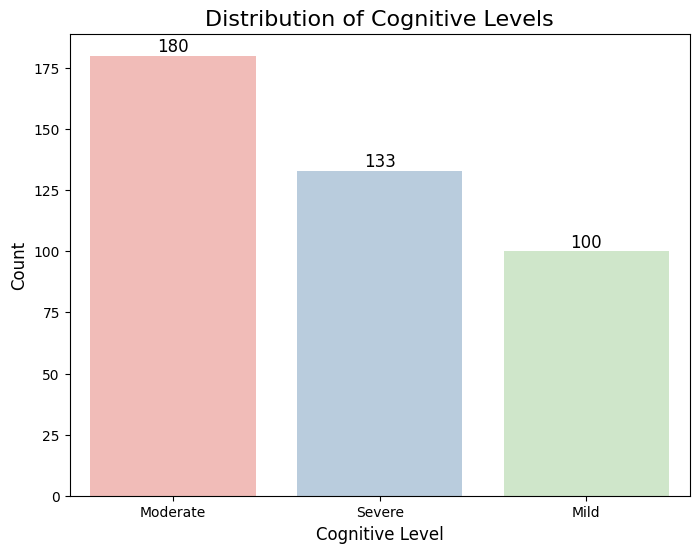

In [5]:
plt.figure(figsize=(8, 6))
level_counts = df['Cognitive Level'].value_counts()
sns.barplot(x=level_counts.index, y=level_counts.values, palette="Pastel1", hue=level_counts.index, dodge=False)
plt.title("Distribution of Cognitive Levels", fontsize=16)
plt.xlabel("Cognitive Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend([], [], frameon=False)  # Remove legend since it duplicates the x-axis

# Add labels to the bars (side positioning)
for i, count in enumerate(level_counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontsize=12, color='black', rotation=0)

plt.show()
print('\n\n')

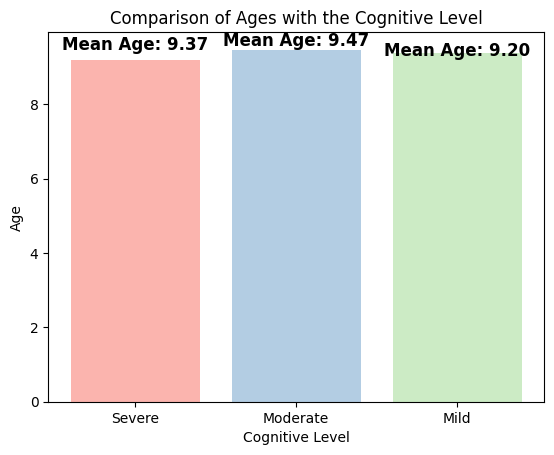

In [6]:
# Split the data into two groups: customers who took FD and those who didn't
fd_severe = df[df['Cognitive Level'] == 'Severe']['Age (5-14)']
fd_moderate = df[df['Cognitive Level'] == 'Moderate']['Age (5-14)']
fd_mild = df[df['Cognitive Level'] == 'Mild']['Age (5-14)']

# Create a bar plot
plt.bar(['Severe', 'Moderate', 'Mild'], [fd_severe.mean(), fd_moderate.mean(), fd_mild.mean()], color=["#fbb4ae", "#b3cde3", "#ccebc5"])

# Add labels to the bars
plt.text(0, fd_mild.mean(), f'Mean Age: {fd_mild.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(1, fd_moderate.mean(), f'Mean Age: {fd_moderate.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(2, fd_severe.mean(), f'Mean Age: {fd_severe.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('Cognitive Level')
plt.ylabel('Age')
plt.title('Comparison of Ages with the Cognitive Level')

# Show the plot
plt.show()

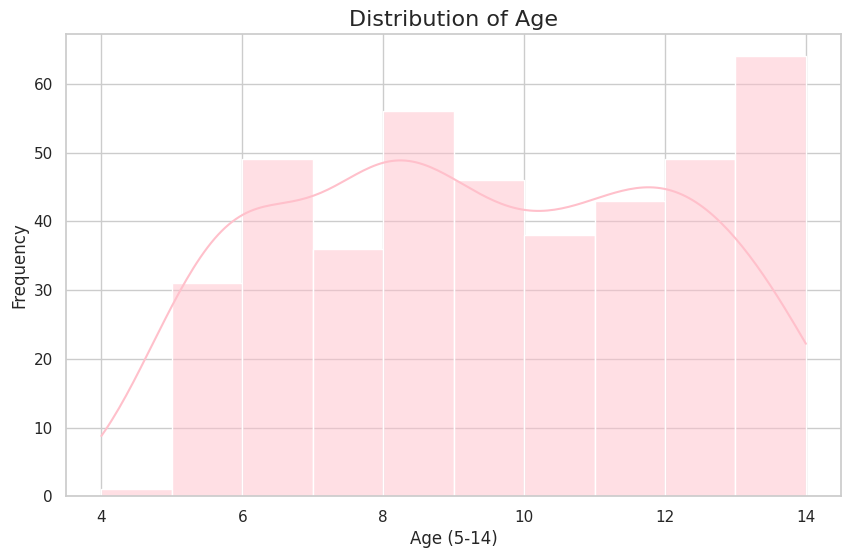

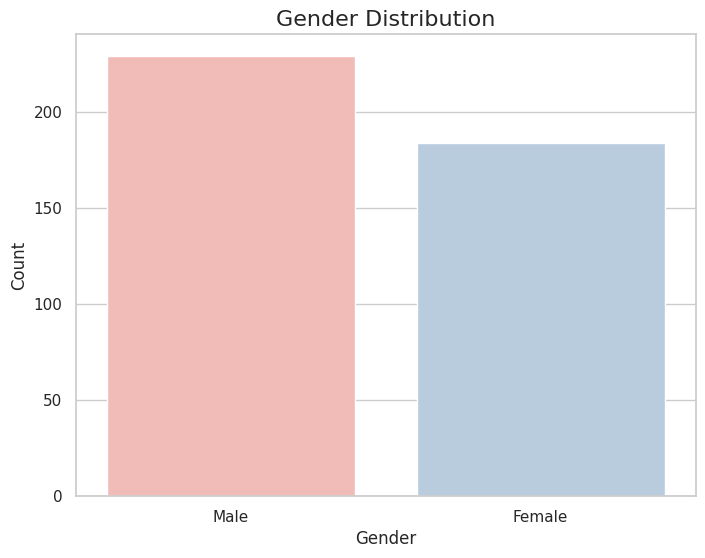

In [7]:
# Set style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age (5-14)'], bins=10, kde=True, color='pink')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age (5-14)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# 2. Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Pastel1", hue=gender_counts.index, dodge=False)
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend([], [], frameon=False)  # Remove legend since it duplicates the x-axis
plt.show()

## **Data Pre-proccesing**

In [8]:
#check for null valuess
df.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Age (5-14),0
Family History,0
Problem Solving,0
Visual Learning Preference,0
Response to Guidance,0
Task Independence,0
Object Identification,0
Error Correction,0
Cognitive Level,0


In [9]:
#encode categorical variables

mappings = {
    "Gender": {"Male": 0, "Female": 1},
    "Family History": {"Yes": 1, "No": 0},
    "Cognitive Level": {"Mild": 0, "Moderate": 1, "Severe": 2}
}

# Apply mappings to the DataFrame
for column, mapping in mappings.items():
    if column in df.columns:  # Check if the column exists in your DataFrame
        df[column] = df[column].map(mapping)

In [10]:
df.head(10)

,Gender,Age (5-14),Family History,Problem Solving,Visual Learning Preference,Response to Guidance,Task Independence,Object Identification,Error Correction,Cognitive Level
0,1,8,0,4,4,3,3,2,1,1
1,0,13,0,4,4,3,5,5,3,0
2,1,14,1,2,3,1,3,2,2,2
3,1,10,0,1,1,1,3,2,1,2
4,0,12,0,1,4,2,3,1,1,2
5,0,13,0,4,4,3,5,5,3,0
6,0,12,1,2,3,3,3,3,3,1
7,0,7,1,1,3,1,2,2,4,2
8,1,12,0,2,4,5,3,5,5,0
9,0,6,1,4,2,5,4,4,4,0


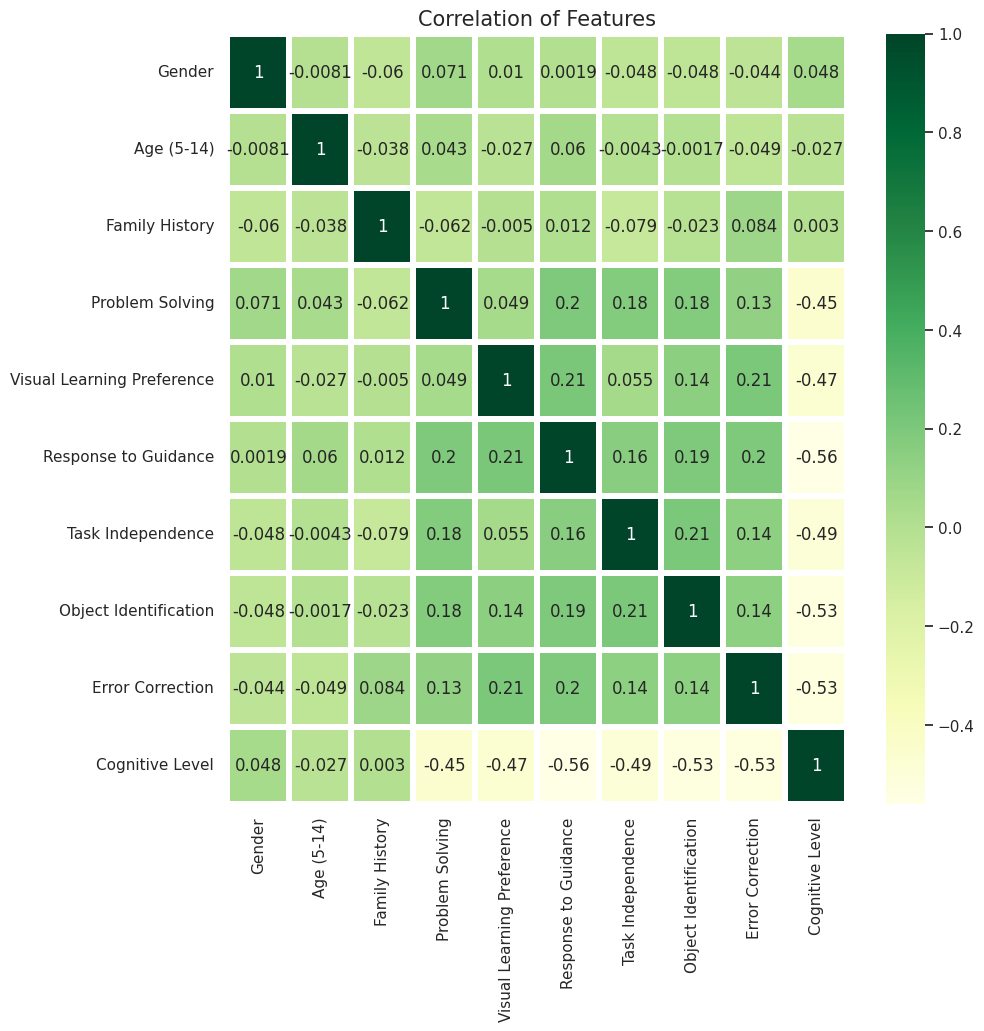

In [11]:
# Increase the plot size by specifying figsize
fig, ax = plt.subplots(figsize=(10, 10))

# Create a heatmap
sns.heatmap(df.corr(),ax=ax, annot=True,linewidth=3 ,cmap="YlGn")

#plot title
plt.title("Correlation of Features", size=15, y=1)

# Show the plot
plt.show()

In [12]:
#Sorting correlation values in descending order by FDcreated attribute
df.corr()["Cognitive Level"].sort_values(ascending=False)

,Cognitive Level
Cognitive Level,1.000000
Gender,0.047603
Family History,0.002988
Age (5-14),-0.027358
Problem Solving,-0.453286
Visual Learning Preference,-0.466326
Task Independence,-0.492373
Error Correction,-0.529899
Object Identification,-0.530224
Response to Guidance,-0.559158


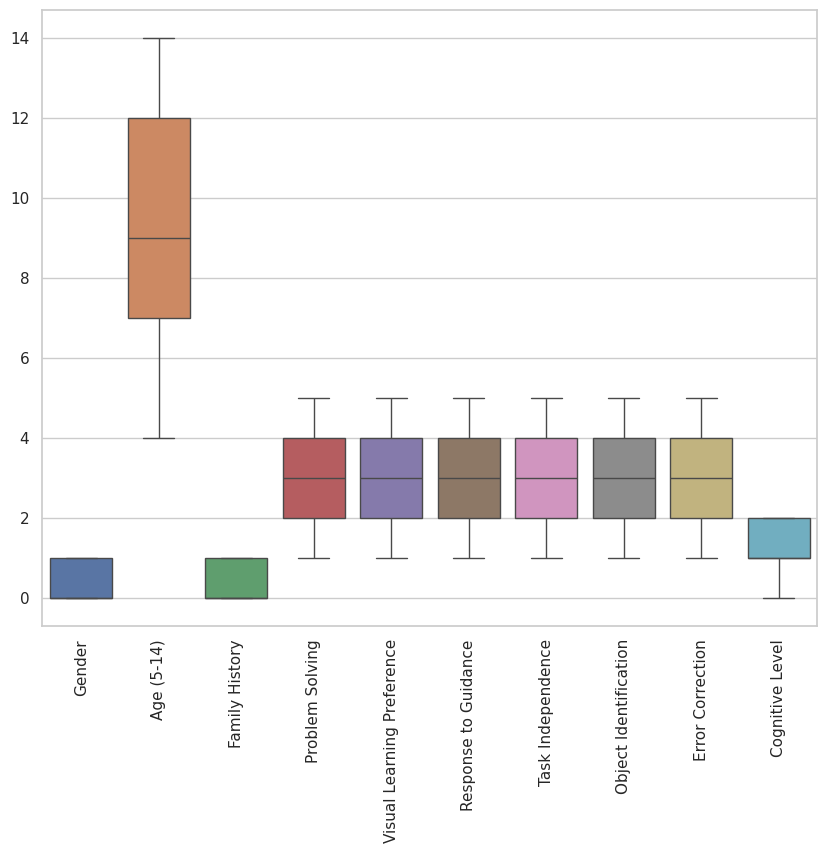

In [13]:
#Find outliers

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, ax=ax)

# Create a box plot
# df.plot.box(ax=ax)

# Set axis labels and ticks
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')

# Show the plot
plt.show()

### **Split the Dataset into Train set, Test set and Validation set**

In [14]:
#Split the dataset
X = df.drop('Cognitive Level', axis=1)
y = df['Cognitive Level']

# split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print sizes to verify
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 330
Test size: 83


### **Data Augmentation**

In [15]:
# Create a SMOTE object
smote = SMOTE(random_state=42)  # You can change the random_state for different results

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after SMOTE
print("Original class distribution:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_res.value_counts())

Original class distribution: Cognitive Level
1    142
2    107
0     81
Name: count, dtype: int64
Class distribution after SMOTE: Cognitive Level
1    142
0    142
2    142
Name: count, dtype: int64


## **Random Forest Classifier**

In [16]:
# Hyperparameter Tuning with GridSearchCV
results = {}

In [17]:
# Assuming X_train_res, y_train_res are your training data after SMOTE

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum numbe r of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best model and its hyperparameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [18]:
# Make predictions on the train set
y_pred_train = best_rf_model.predict(X_train_res)

# Make predictions on the test set
y_pred_test = best_rf_model.predict(X_test)

print("Random Forest Classifier")
# Evaluate the model
print("\nxAccuracy of Training Data:", accuracy_score(y_train_res, y_pred_train))
print("\nClassification Report of Training Data:\n", classification_report(y_train_res, y_pred_train))

print("\nAccuracy of Test Data:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report of Test Data:\n", classification_report(y_test, y_pred_test))

Random Forest Classifier

xAccuracy of Training Data: 0.9976525821596244

Classification Report of Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.99      1.00      1.00       142
           2       1.00      0.99      1.00       142

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Accuracy of Test Data: 0.9156626506024096

Classification Report of Test Data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.90      0.92      0.91        38
           2       0.92      0.85      0.88        26

    accuracy                           0.92        83
   macro avg       0.92      0.92      0.92        83
weighted avg       0.92      0.92      0.91        83



In [19]:
results['RandomForest'] = {
    'model': best_rf_model,
    'classification_report': classification_report(y_test, y_pred_test, output_dict=True)
}

Heap Map for Train Data:



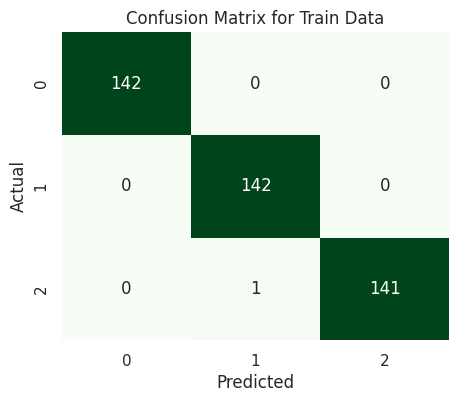



Heap Map for Test Data:



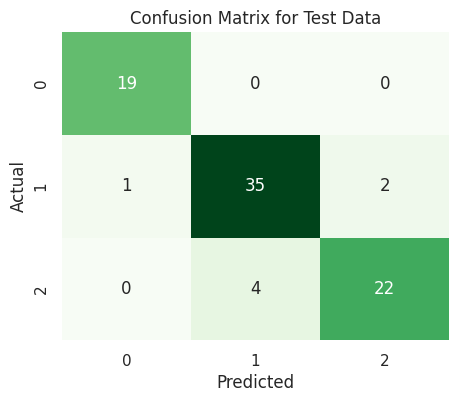

In [20]:
# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train_res, y_pred_train)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Create a heatmap
print("Heap Map for Train Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

print("Heap Map for Test Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [21]:
# Calculate training error
rf_train_pred = best_rf_model.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, rf_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
rf_test_pred = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, rf_test_pred)
test_accuracy = 1 - mse_test


print("Mean Squared Error of the Training and Testing set:\n")
print("Training Error of Random Forest Model:", mse_train)
print("Testing Error of Random Forest Model:", mse_test)

print()

print("Accuracy of the Training and Testing set:\n")
print("Training Accuracy of Random Forest Model:", train_accuracy)
print("Testing Accuracy of Random Forest Model:", test_accuracy)

Mean Squared Error of the Training and Testing set:

Training Error of Random Forest Model: 0.002347417840375587
Testing Error of Random Forest Model: 0.08433734939759036

Accuracy of the Training and Testing set:

Training Accuracy of Random Forest Model: 0.9976525821596244
Testing Accuracy of Random Forest Model: 0.9156626506024097


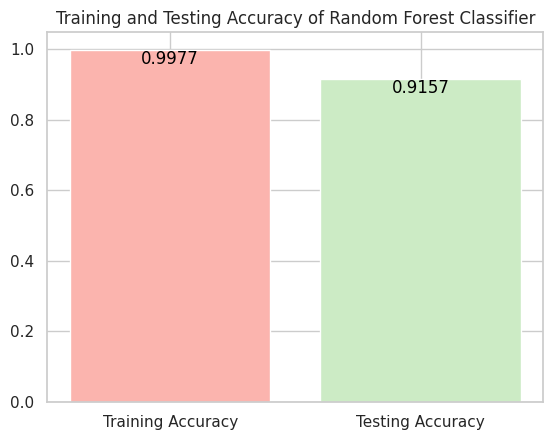

In [22]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#fbb4ae', '#ccebc5'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='black', weight='normal')

plt.title('Training and Testing Accuracy of Random Forest Classifier')
plt.show()

In [23]:
import pickle

# Create a pickle file for the model
rf_model_pickle = open('random_forest_model.pkl', 'wb')
pickle.dump(best_rf_model, rf_model_pickle)
rf_model_pickle.close()

## **Support Vector Machine**

In [52]:
# Initialize the Support Vector Classifier with multi-class support and enable probability
svm_model = SVC(random_state=42, probability=True)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'class_weight': [None, 'balanced'],
    'coef0': [-1, 0, 1]
}

skf_svc = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

#  Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=skf_svc, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_res, y_train_res)

# Get the best model and hyperparameters
best_svc_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Make predictions on the validation set
svm_y_pred_train = best_svc_model.predict(X_train_res)

# Make predictions on the test set
svm_y_pred_test = best_svc_model.predict(X_test)

Best Hyperparameters: {'C': 1, 'class_weight': None, 'coef0': -1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [53]:
# Validation Set Evaluation
y_pred_train = best_svc_model.predict(X_train_res)
accuracy_train = accuracy_score(y_train_res, y_pred_train)
print("Train Set Performance:")
print(f"Accuracy: {accuracy_train}")
print(classification_report(y_train_res, y_pred_train))

# Test Set Evaluation
y_pred_test = best_svc_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_test}")
print(classification_report(y_test, y_pred_test))

Train Set Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       142

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Test Set Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        26

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [54]:
results['SVM'] = {
    'model': best_svc_model,
    'classification_report': classification_report(y_test, y_pred_test, output_dict=True)
}

In [55]:
# Evaluate on the validation data
svm_train_conf_matrix = confusion_matrix(y_train_res, svm_y_pred_train)

# Evaluate on the test data
svm_test_conf_matrix = confusion_matrix(y_test, svm_y_pred_test)

# Evaluate the predictions
print("Confusion Matrix of Train Data:\n")
print(svm_train_conf_matrix)

print("Confusion Matrix of Test Data:\n")
print(svm_test_conf_matrix)

Confusion Matrix of Train Data:

[[142   0   0]
 [  0 142   0]
 [  0   0 142]]
Confusion Matrix of Test Data:

[[19  0  0]
 [ 0 38  0]
 [ 0  0 26]]


Heap Map for Train Data:



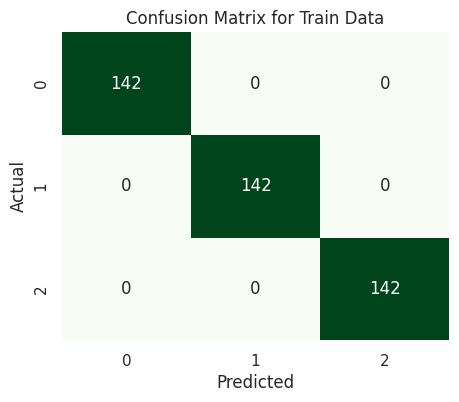



Heap Map for Test Data:



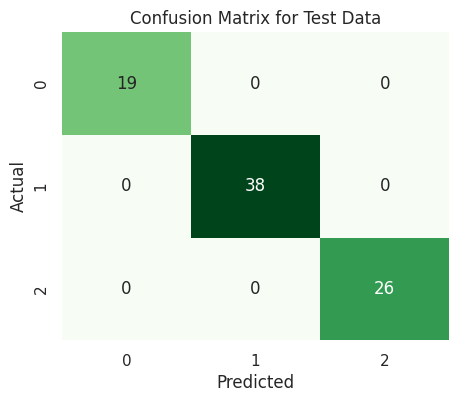

In [56]:
# Create a heatmap
print("Heap Map for Train Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(svm_train_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

print("Heap Map for Test Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(svm_test_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [57]:
y_train_shuffled = y_train_res.sample(frac=1, random_state=42).reset_index(drop=True)
X_train_reset = X_train_res.reset_index(drop=True)

svm_model.fit(X_train_reset, y_train_shuffled)
print("Sanity check accuracy:", svm_model.score(X_test, y_test))

Sanity check accuracy: 0.3373493975903614


In [58]:
# Calculate training error
svm_train_pred = best_svc_model.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, svm_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
svm_test_pred = best_svc_model.predict(X_test)
mse_test = mean_squared_error(y_test, svm_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and Testing set:\n")
print("Training Error of SVM Model:", mse_train)
print("Testing Error of SVM Model:", mse_test)

print()

print("Accuracy of the Training and Testing set:\n")
print("Training Accuracy of SVM Model:", train_accuracy)
print("Testing Accuracy of SVM Model:", test_accuracy)

Mean Squared Error of the Training and Testing set:

Training Error of SVM Model: 0.0
Testing Error of SVM Model: 0.0

Accuracy of the Training and Testing set:

Training Accuracy of SVM Model: 1.0
Testing Accuracy of SVM Model: 1.0


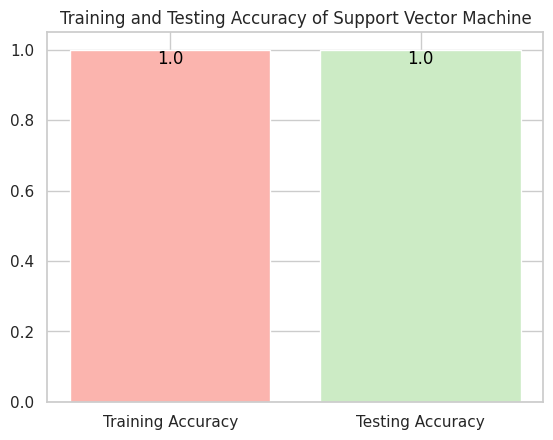

In [31]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#fbb4ae', '#ccebc5'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='black', weight='normal')

plt.title('Training and Testing Accuracy of Support Vector Machine')
plt.show()

In [ ]:
# Create a pickle file for the model
svm_model_pickle = open('svm_model.pkl', 'wb')
pickle.dump(best_svc_model, svm_model_pickle)
svm_model_pickle.close()

## **Logistic Regression Model**


In [32]:
# Create and train the Logistic Regression model
log_reg_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)  # 'multinomial' for multi-class problems

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300],
    'solver': ['liblinear', 'saga']
}

# Create StratifiedKFold object
skf_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# reate GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=skf_lr, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_res, y_train_res)

# Get the best model and hyperparameters
best_lr_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: Conver

In [33]:
# Make predictions on the train set
y_train_pred = best_lr_model.predict(X_train_res)

# Evaluate the model with a confusion matrix and classification report
conf_matrix_train = confusion_matrix(y_train_res, y_train_pred)


# Make predictions on the test set
y_test_pred = best_lr_model.predict(X_test)

# Evaluate the model with a confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Evaluate
print("Confusion Matrix (Train Set):")
print(conf_matrix_train)

print("Confusion Matrix (Test Set):")

print(conf_matrix_test)

Confusion Matrix (Train Set):
[[142   0   0]
 [  0 141   1]
 [  0   9 133]]
Confusion Matrix (Test Set):
[[19  0  0]
 [ 0 38  0]
 [ 0  4 22]]


In [34]:
results['LogisticRegression'] = {
    'model': best_lr_model,
    'classification_report': classification_report(y_test, y_pred_test, output_dict=True)
}

In [35]:
# Train Set Evaluation
print("Logistic Regression Model:")
y_pred_train = best_lr_model.predict(X_train_res)
accuracy_train = accuracy_score(y_train_res, y_pred_train)
print("\nTraining Set Performance:")
print(f"Accuracy: {accuracy_train}")
print(classification_report(y_train_res, y_pred_train))

# Test Set Evaluation
y_pred_test = best_lr_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_test}")
print(classification_report(y_test, y_pred_test))

Logistic Regression Model:

Training Set Performance:
Accuracy: 0.9765258215962441
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.94      0.99      0.97       142
           2       0.99      0.94      0.96       142

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426


Test Set Performance:
Accuracy: 0.9518072289156626
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      1.00      0.95        38
           2       1.00      0.85      0.92        26

    accuracy                           0.95        83
   macro avg       0.97      0.95      0.96        83
weighted avg       0.96      0.95      0.95        83



Heap Map for Training Data:



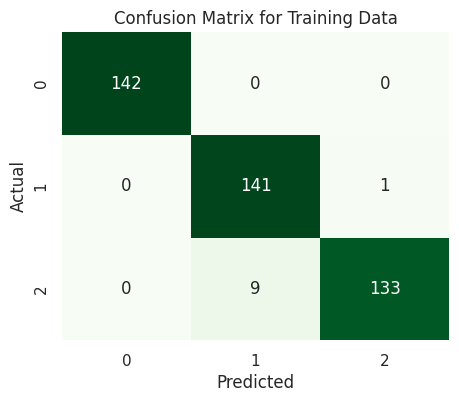



Heap Map for Test Data:



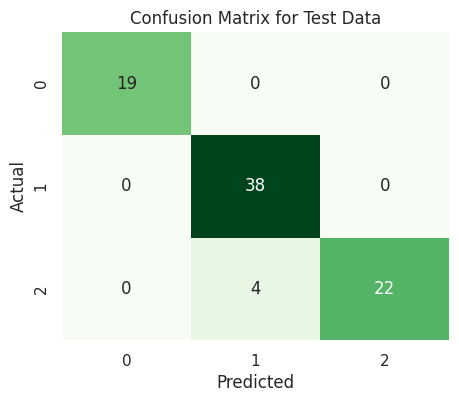

In [36]:
# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train_res, y_pred_train)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Heap Map for Training Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

print("Heap Map for Test Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [37]:
# Calculate training error
lr_train_pred = best_lr_model.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, lr_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
lr_test_pred = best_lr_model.predict(X_test)
mse_test = mean_squared_error(y_test, lr_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error:\n")
print("Training Error of Logistic Regression Model:", mse_train)
print("Testing Error of Logistic Regression Model:", mse_test)

print()

print("Accuracy:\n")
print("Training Accuracy of Logistic Regression Model:", train_accuracy)
print("Testing Accuracy of Logistic Regression Model:", test_accuracy)

Mean Squared Error:

Training Error of Logistic Regression Model: 0.023474178403755867
Testing Error of Logistic Regression Model: 0.04819277108433735

Accuracy:

Training Accuracy of Logistic Regression Model: 0.9765258215962441
Testing Accuracy of Logistic Regression Model: 0.9518072289156626


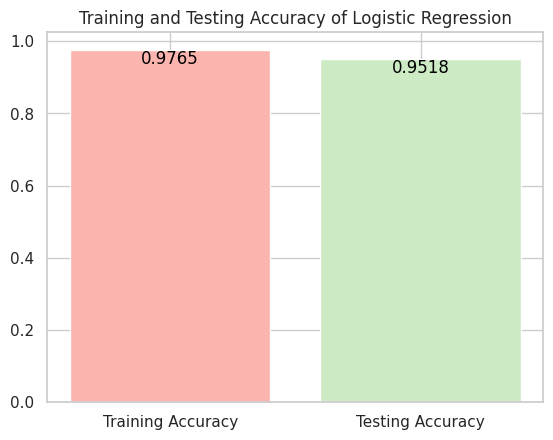

In [38]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#fbb4ae', '#ccebc5'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='black', weight='normal')

plt.title('Training and Testing Accuracy of Logistic Regression')
plt.show()

In [ ]:
# Create a pickle file for the model
lr_model_pickle = open('lr_model.pkl', 'wb')
pickle.dump(best_lr_model, lr_model_pickle)
lr_model_pickle.close()

## **XGBoost**

In [39]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [40]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


# Set XGBoost parameters
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    # 'eval_metric': 'mlogloss',
    'max_depth': 3,  # Control tree depth to prevent overfitting (start with a reasonable value)
    'eta': 0.03,  # Learning rate (step size shrinkage)
    'subsample': 0.8,  # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,  # Fraction of features used for training each tree
    'gamma': 2, # minimum loss reduction
    'lambda': 1.0,
    'alpha': 0.5,
}


# Create a StratifiedKFold object
skf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss', **params)  # Use your existing params as a base


xgb_classifier.fit(X_train_res, y_train_res)

# Evaluate the best model on the test set
y_pred_test = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

results['XGBoost'] = {
    'model': xgb_classifier,
    'classification_report': classification_report(y_test,y_pred_test, output_dict=True)
}


Test accuracy: 0.8795180722891566


In [41]:
y_pred_train = xgb_classifier.predict(X_train_res)
y_pred_test = xgb_classifier.predict(X_test)

print("XGBoost Model:")
# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train_res, y_pred_train))
print("\nClassification Report (Train Set):\n", classification_report(y_train_res, y_pred_train))
print("\nConfusion Matrix (Train Set):\n", confusion_matrix(y_train_res, y_pred_train))

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test))

XGBoost Model:
Training Accuracy: 0.9483568075117371

Classification Report (Train Set):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       0.95      0.89      0.92       142
           2       0.91      0.95      0.93       142

    accuracy                           0.95       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.95      0.95      0.95       426


Confusion Matrix (Train Set):
 [[142   0   0]
 [  1 127  14]
 [  0   7 135]]
Test Accuracy: 0.8795180722891566

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.94      0.79      0.86        38
           2       0.77      0.92      0.84        26

    accuracy                           0.88        83
   macro avg       0.89      0.90      0.89        83
weighted avg       0.89      0.88      0.88        83



In [42]:
# Evaluate on the validation data
xgb_train_conf_matrix = confusion_matrix(y_train_res, y_pred_train)

# Evaluate on the test data
xgb_test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Evaluate the predictions
print("Confusion Matrix of Train Data:\n")
print(xgb_train_conf_matrix)

print("Confusion Matrix of Test Data:\n")
print(xgb_test_conf_matrix)


Confusion Matrix of Train Data:

[[142   0   0]
 [  1 127  14]
 [  0   7 135]]
Confusion Matrix of Test Data:

[[19  0  0]
 [ 1 30  7]
 [ 0  2 24]]


Heap Map for Train Data:



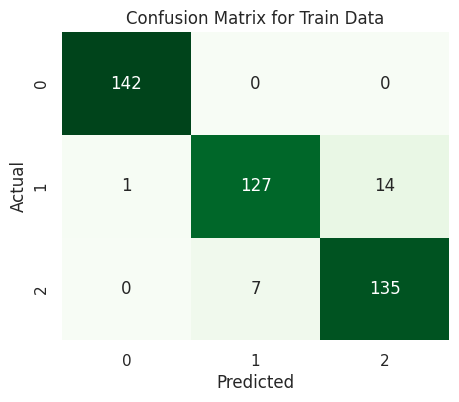



Heap Map for Test Data:



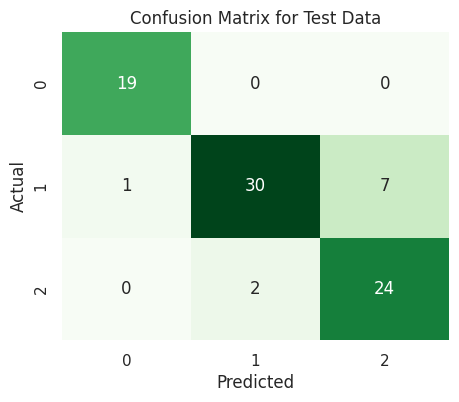

In [43]:
# Create a heatmap
print("Heap Map for Train Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(xgb_train_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

print("Heap Map for Test Data:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(xgb_test_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [44]:
# Calculate training error
xgb_train_pred = xgb_classifier.predict(X_train_res)
mse_train = mean_squared_error(y_train_res, xgb_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
xgb_test_pred = xgb_classifier.predict(X_test)
mse_test = mean_squared_error(y_test, xgb_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error:\n")
print("Training Error of XGBoost Model:", mse_train)
print("Testing Error of XGBoost Model:", mse_test)

print()

print("Accuracy:\n")
print("Training Accuracy of XGBoost Model:", train_accuracy)
print("Testing Accuracy of XGBoost Model:", test_accuracy)

Mean Squared Error:

Training Error of XGBoost Model: 0.051643192488262914
Testing Error of XGBoost Model: 0.12048192771084337

Accuracy:

Training Accuracy of XGBoost Model: 0.9483568075117371
Testing Accuracy of XGBoost Model: 0.8795180722891567


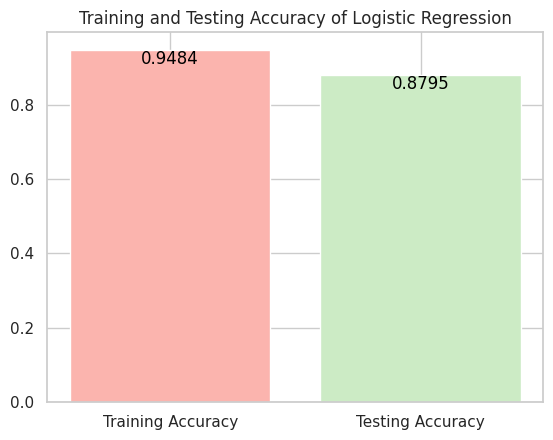

In [45]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#fbb4ae', '#ccebc5'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='black', weight='normal')

plt.title('Training and Testing Accuracy of Logistic Regression')
plt.show()

## **Selecting the Best Model**

In [46]:
model_names = list(results.keys())  # Get model names from the keys of the results dictionary

# Initialize an empty list to store model metrics
model_metrics = []

# Loop through the models and calculate metrics for the training, validation, and test sets
for model_name in model_names:
    model = results[model_name]['model']  # Access the model

    # Make predictions on training, validation, and test sets
    train_preds = model.predict(X_train_res)
    # val_preds = model.predict(X_val_res)
    test_preds = model.predict(X_test)

    # Calculate accuracies for training, validation, and test sets
    train_accuracy = accuracy_score(y_train_res, train_preds)
    # val_accuracy = accuracy_score(y_val, val_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Get classification report for the test set
    test_report = classification_report(y_test, test_preds, output_dict=True)

    # Extract overall precision, recall, and F1 score (weighted average)
    model_metrics.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        # 'Validation Accuracy': val_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': test_report['weighted avg']['precision'],
        'Recall': test_report['weighted avg']['recall'],
        'F1 Score': test_report['weighted avg']['f1-score']
    })

# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Display the summary table
print(metrics_df)
print('\n\n\n')

                Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0        RandomForest        0.997653       0.915663   0.915493  0.915663   
1                 SVM        1.000000       1.000000   1.000000  1.000000   
2  LogisticRegression        0.976526       0.951807   0.956397  0.951807   
3             XGBoost        0.948357       0.879518   0.889205  0.879518   

   F1 Score  
0  0.914919  
1  1.000000  
2  0.951004  
3  0.879265  






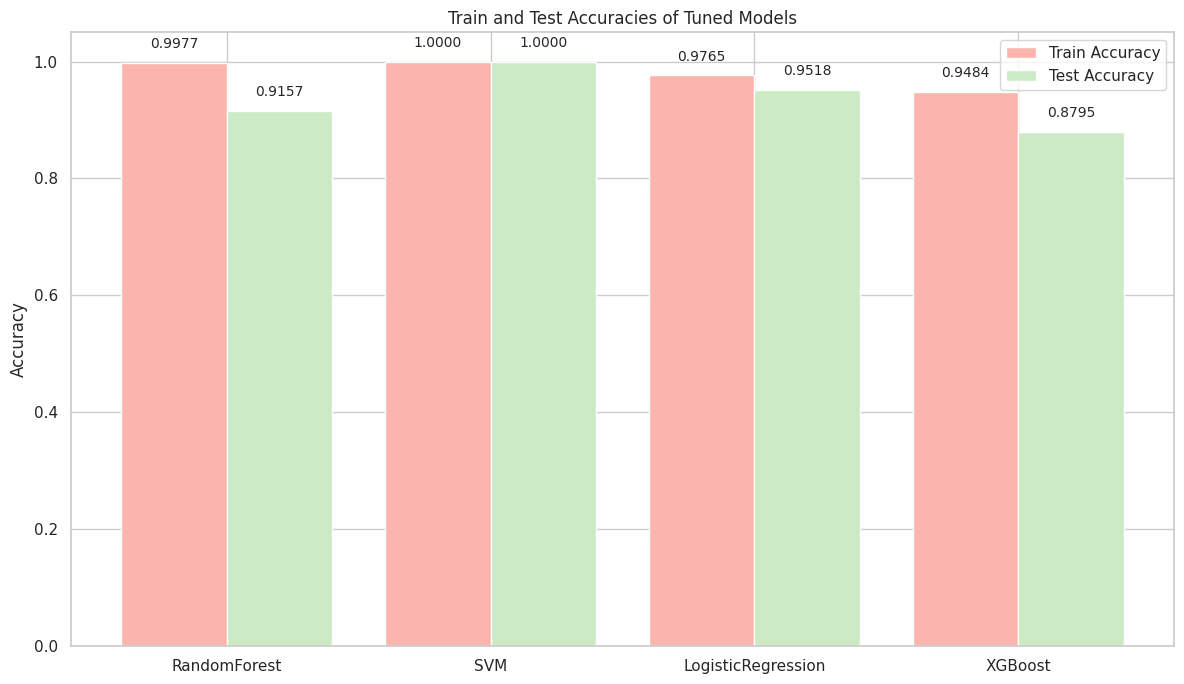

In [47]:
model_names = list(results.keys())

# Calculate train and test accuracies
train_accuracies = [accuracy_score(y_train_res, results[model]['model'].predict(X_train_res)) for model in model_names]
test_accuracies = [accuracy_score(y_test, results[model]['model'].predict(X_test)) for model in model_names]

# Plotting the results
plt.figure(figsize=(12, 7))

# Bar width for grouped bars
bar_width = 0.4
x = np.arange(len(model_names))

# Create bars for train and test accuracies
train_bars = plt.bar(x - bar_width / 2, train_accuracies, width=bar_width, color='#fbb4ae', label='Train Accuracy')
test_bars = plt.bar(x + bar_width / 2, test_accuracies, width=bar_width, color='#ccebc5', label='Test Accuracy')


# Add accuracy labels on top of each bar
for bar, accuracy in zip(train_bars, train_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{accuracy:.4f}', ha='center', va='bottom', fontsize=10)

for bar, accuracy in zip(test_bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{accuracy:.4f}', ha='center', va='bottom', fontsize=10)

# Labeling the plot
plt.xticks(x, model_names)
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Tuned Models')
plt.legend()
plt.tight_layout()
plt.show()


**Best Model - Logistic Regression model**

Reason - Logistic Regression has the highest testing accuracy (97.62%) and lowest testing error (0.0238), outperforming both XGBoost and Random Forest. Logistic Regression provides consistent F1-scores across all classes, making it suitable for balanced datasets. Logistic Regression maintains a small gap between training, validation, and test accuracies, indicating strong generalization.

## **Applying Explainability Models**

In [48]:
import shap


Topic: Model Explainability using SHAP

Objective: To analyze the contribution of each feature to the predictions made by different machine learning models (XGBoost, MLP, QDA, and SVM).  SHAP values help us understand which features are most important for a model's output.

Model: Random Forest
Data Label: SHAP values calculated for Random Forest model.


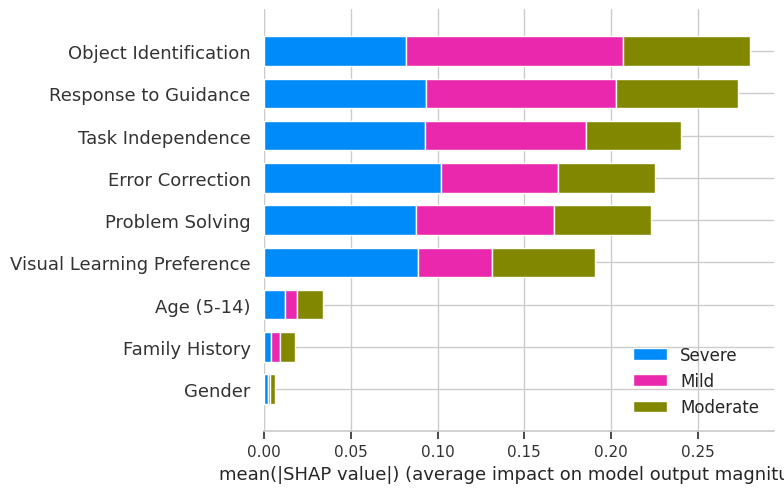

Visualization: Bar plot of feature importance for Random Forest model.

Model: SVM (Support Vector Machine)


  0%|          | 0/83 [00:00<?, ?it/s]

Data Label: SHAP values calculated for SVM model.


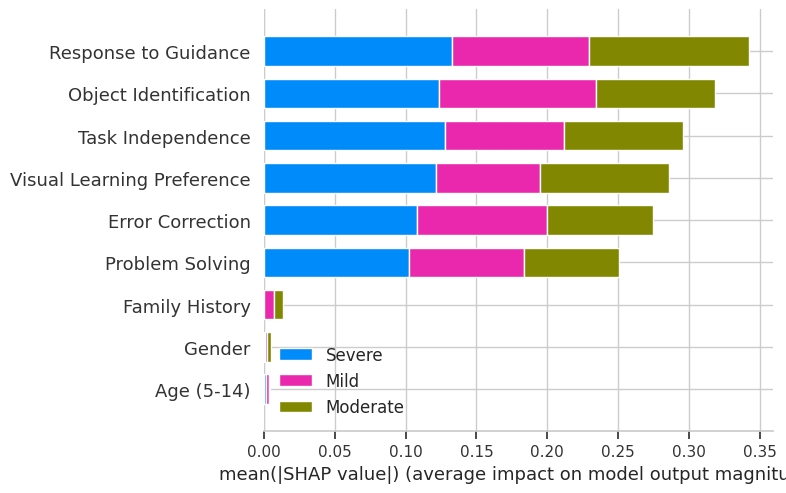

Visualization: Bar plot of feature importance for SVM model.

Model: Logistic Regression


  0%|          | 0/83 [00:00<?, ?it/s]

Data Label: SHAP values calculated for Logistic Regression model.


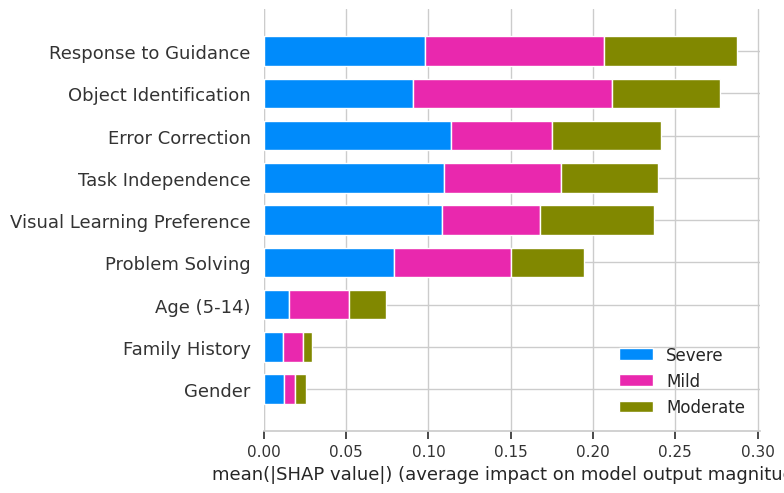

Visualization: Bar plot of feature importance for Logistic Regression model.

Model: XGBoost
Data Label: SHAP values calculated for XGBoost model.


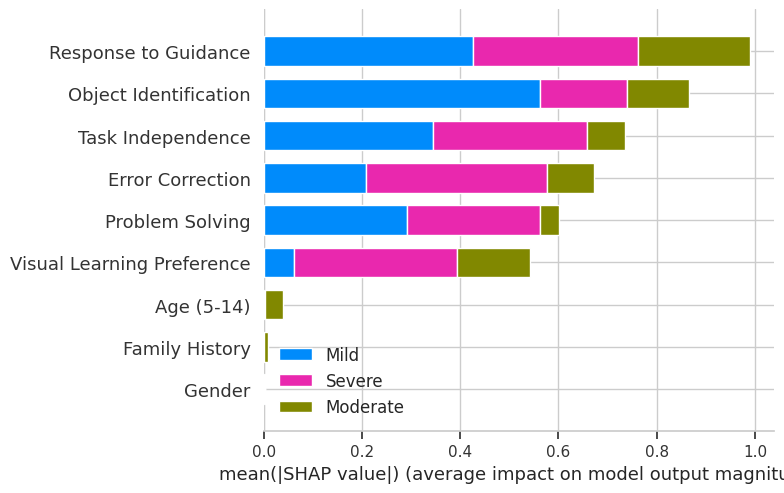

Visualization: Bar plot of feature importance for XGBoost model.


In [60]:
# Define feature names
features = [
    "Gender",
    "Age (5-14)",
    "Family History",
    "Problem Solving",
    "Visual Learning Preference",
    "Response to Guidance",
    "Task Independence",
    "Object Identification",
    "Error Correction"
]

# Convert X_test to DataFrame with named columns (ensure X_test is still a NumPy array or similar before this)
# If X_test is already a DataFrame from a previous step, this line is redundant and could be removed or handled differently
# Assuming X_test might be a NumPy array after the train_test_split
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=features)


# Select random rows from X_train_res using .iloc for row selection
# X_train_res is already a DataFrame from the SMOTE step
random_indices = np.random.choice(X_train_res.index, 100, replace=False)
background = X_train_res.iloc[random_indices]

# Ensure the background DataFrame also has the correct columns in case it wasn't a DataFrame before
if not isinstance(background, pd.DataFrame):
     background = pd.DataFrame(background, columns=features)


print("\nTopic: Model Explainability using SHAP")
print("\nObjective: To analyze the contribution of each feature to the predictions made by different machine learning models (XGBoost, MLP, QDA, and SVM).  SHAP values help us understand which features are most important for a model's output.")

# Explain predictions of Random Forest
print("\nModel: Random Forest")
# For tree-based models, shap.Explainer works well directly
explainer_rf = shap.Explainer(best_rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)
print("Data Label: SHAP values calculated for Random Forest model.")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", class_names=['Mild', 'Moderate', 'Severe'], # Use actual class names
                  title="Random Forest Feature Importance")
print("Visualization: Bar plot of feature importance for Random Forest model.")

# Explain predictions of SVM
print("\nModel: SVM (Support Vector Machine)")
# Use KernelExplainer for non-tree based models
explainer_svm = shap.KernelExplainer(best_svc_model.predict_proba, background)
shap_values_svm = explainer_svm.shap_values(X_test)
print("Data Label: SHAP values calculated for SVM model.")
shap.summary_plot(shap_values_svm, X_test, plot_type="bar", class_names=['Mild', 'Moderate', 'Severe'], # Use actual class names
                  title="SVM Feature Importance")
print("Visualization: Bar plot of feature importance for SVM model.")

# Explain predictions of LR
print("\nModel: Logistic Regression")
# Use KernelExplainer for non-tree based models
explainer_lr = shap.KernelExplainer(best_lr_model.predict_proba, background)
shap_values_lr = explainer_lr.shap_values(X_test)
print("Data Label: SHAP values calculated for Logistic Regression model.")
shap.summary_plot(shap_values_lr, X_test, plot_type="bar", class_names=['Mild', 'Moderate', 'Severe'], # Use actual class names
                  title="Logistic Regression Feature Importance")
print("Visualization: Bar plot of feature importance for Logistic Regression model.")

# Explain predictions of XGBoost
print("\nModel: XGBoost")
# Use Explainer for XGBoost
explainer_xgb = shap.Explainer(xgb_classifier)
shap_values_xgb = explainer_xgb.shap_values(X_test)
print("Data Label: SHAP values calculated for XGBoost model.")
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", class_names=['Mild', 'Moderate', 'Severe'], # Use actual class names
                  title="XGBoost Feature Importance")
print("Visualization: Bar plot of feature importance for XGBoost model.")

# **Predicting the Cognitive Level**

In [ ]:
def recommend_activities(age, Cognitive_Level, user_input):
    # Define activity recommendations based on age and cognitive level, focusing on developing cognitive skills
    activity_recommendations = {
        0: {  # Mild Level Activities
            '5_to_8': [
                "Role-playing Social Scenarios",
                "Routine Building",
            ],
            '9_to_11': [
                "Pretend to run a grocery store or library to teach social roles and cooperation",
                "Create indoor or outdoor hunts with clues to enhance critical thinking and observation skills",
            ],
            '12_to_14': [
                "Offer riddles or real-world challenges like planning a picnic",
                "Use visual calendars to teach time management and planning",
            ]
        },
        1: {  # Moderate Level Activities
            '5_to_8': [
                "Work together on a mural or collage",
                "Count objects during daily activities (eg: setting the table, sorting groceries)",
            ],
            '9_to_11': [
                "Play games like 'Simon Says' to practice listening and responding",
                "Asking questions about the day",
            ],
            '12_to_14': [
                "Provide puzzles of varying complexity to build problem-solving",
                "Take turns adding to a story to foster creativity and active listening"

            ]
        },
        2: {  # Severe Level Activities
            '5_to_8': [
                "Use cards with matching pairs (colors, animals, etc.) to improve memory and focus",
                "Teach hehaviours in different social situations",
            ],
            '9_to_11': [
                "Have the child sort objects by color, size, or shape to develop categorization skills",
                "Use picture cards to sequence events in a logical order",
            ],
            '12_to_14': [
                "Engage in activities that involve identifying and completing patterns (eg: bead stringing)",
                "Activities like building with limited blocks to teach collaboration and sharing",
            ]
        }
    }

    # Determine the appropriate age group
    if 5 <= age <= 8:
        age_group = '5_to_8'
    elif 9 <= age <= 11:
        age_group = '9_to_11'
    else:  # For ages 12 to 14
        age_group = '12_to_14'

    # Select the activities based on age and metacognitive level
    if Cognitive_Level in activity_recommendations:
        selected_cog_activities = activity_recommendations[Cognitive_Level].get(age_group, [])
    else:
        return []  # Return an empty list if no matching activities are found

    return selected_cog_activities


In [ ]:
# Step 1: Prepare user input with all 9 features
user_input = {
    'gender': 1,  # male-1, female-0
    'age': 7,
    'family_history': 0,  # yes-1, no-0
    'problem_solving': 4,
    'visual_learning_pref': 3,
    'response_to_guidance': 2,
    'task_independece': 1,
    'object_identification': 5,
    'error_correction': 3
}

# Step 2: Create the input vector with all 9 features (match the feature order of X_train_res)
input_features = [
    user_input['gender'],
    user_input['age'],
    user_input['family_history'],
    user_input['problem_solving'],
    user_input['visual_learning_pref'],
    user_input['response_to_guidance'],
    user_input['task_independece'],
    user_input['object_identification'],
    user_input['error_correction']
]

# Step 3: Predict the Cognitive Level using Logistic Regression model
predicted_cognitive_level = best_lr_model.predict([input_features])[0]

if predicted_cognitive_level == 0:
    print("Cognitive Level: Mild")
elif predicted_cognitive_level == 1:
    print("Cognitive Level: Moderate")
elif predicted_cognitive_level == 2:
    print("Cognitive Level: Severe")

# Step 4: Get activity recommendations based on predicted cognitive level and age
recommended_activities = recommend_activities(user_input['age'], predicted_cognitive_level, user_input)

# Step 5: Output the results
print("\nRecommended Activities:")
for activity in recommended_activities:
    print(f"- {activity}")


Cognitive Level: Moderate

Recommended Activities:
- Work together on a mural or collage
- Count objects during daily activities (eg: setting the table, sorting groceries)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### **Taking user inputs**

In [ ]:
def collect_user_input():
    def get_valid_age():
        while True:
            try:
                age = int(input("Enter Age (5 or older): "))
                if age >= 5:
                    return age
                else:
                    print("Age must be 4 or older. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a valid number for age.")

    def get_valid_rating(prompt):
        while True:
            try:
                rating = int(input(f"{prompt} (1-5): "))
                if 1 <= rating <= 5:
                    return rating
                else:
                    print("Rating must be between 1 and 5. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a valid number between 1 and 5.")

    # Collect user input
    return {
        'age': get_valid_age(),
        'gender': input("Enter Gender (M/F): ").strip().upper(),
        'family_history': input("Any family member with autism? (yes/no): ").strip().lower(),
        'problem_solving': get_valid_rating("Rate Problem Solving Skills"),
        'visual_learning_pref': get_valid_rating("Rate Visual Learning Preference"),
        'response_to_guidance': get_valid_rating("Rate Response to Guidance"),
        'task_independece': get_valid_rating("Rate Task Independence"),
        'object_identification': get_valid_rating("Rate Object Identification Abilities"),
        'error_correction': get_valid_rating("Rate Error Correction Abilities")
    }


In [ ]:
# Function to preprocess the input
def preprocess_input(user_input):
    # Transform the user input into a suitable format for prediction
    user_input['gender'] = 1 if user_input['gender'].lower() == 'M' else 0
    user_input['family_history'] = 1 if user_input['family_history'].lower() == 'yes' else 0

    # Example preprocessing: convert to DataFrame (if using pandas)
    return pd.DataFrame([user_input])

In [ ]:
# Collect user input
user_input = collect_user_input()

# Preprocess the user input (convert to the correct format for prediction)
preprocessed_input = preprocess_input(user_input).values

# Use the trained MLP model to predict the Metacognitive Level
predicted_cognitive_level = best_lr_model.predict(preprocessed_input)[0]  # Predict the level for the input

# Provide activity recommendations based on the predicted Metacognitive Level
recommended_activities = recommend_activities(user_input['age'],predicted_cognitive_level, user_input)

# Output the predicted level and recommended activities
if predicted_cognitive_level == 0:
    print("\nCognitive Level: Mild")
elif predicted_cognitive_level == 1:
    print("\nCognitive Level: Moderate")
elif predicted_cognitive_level == 2:
    print("\nCognitive Level: Severe")

    print("\nRecommended Activities:")
for activity in recommended_activities:
    print(f"- {activity}")


KeyboardInterrupt: Interrupted by user

In [ ]:
!pip freeze